思想极度简单
应用数学知识少
效果好
可以理解机器学习算法使用过程中的很多细节问题
更完整的刻画机器学习应用的流程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
raw_data_X = np.random.randint(20, size=(10,2))

In [6]:
raw_data_X

array([[12,  4],
       [ 4,  9],
       [15, 17],
       [ 2,  4],
       [ 9,  0],
       [ 4, 14],
       [ 7, 18],
       [16, 11],
       [ 1, 10],
       [ 6,  2]])

# 使用scikit-learn中的knn

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6) # k值

In [17]:
X_train = np.array([[1,2],
           [1,3],
           [2,2],
           [3,2],
           [1,3],
           [2,1],
           [7,8],
           [8,9],
           [7,9],
           [7,7],
           [8,8]])
y_train = np.array([0,0,0,0,0,0,1,1,1,1,1])

In [18]:
kNN_classifier.fit(X_train, y_train) # 拟合

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [21]:
x = np.array([[9,8]]) # 传入一个矩阵

In [22]:
kNN_classifier.predict(x)

array([1])

In [23]:
xx = np.array([[9,8],[10,10],[2,2],[1,0]])

In [24]:
kNN_classifier.predict(xx)

array([1, 1, 0, 0])

In [65]:
%run C:\Users\吴旭辉\Desktop\py学习手记\机械学习\MySki\KNN_classify.py

In [66]:
KNN_classify(6, X_train, y_train, np.array([9,8]))

1

In [67]:
%run C:\Users\吴旭辉\Desktop\py学习手记\机械学习\MySki\KNN_classify.py

In [68]:
knn_clf = KNNClassifier(k=6)

In [69]:
knn_clf.fit(X_train, y_train)

In [70]:
knn_clf.predict(xx)

array([1, 1, 0, 0])

训练得到的模型直接在真实环境中使用.
模型很差怎么办？
真实环境难以拿到真实label？

通过测试数据直接判断模型好坏
在模式进入真实环境前改进模型

train test split

In [72]:
from sklearn import datasets

In [73]:
iris = datasets.load_iris()

In [74]:
x = iris.data

In [75]:
y = iris.target

In [76]:
x.shape

(150, 4)

In [77]:
y.shape

(150,)

## train_test_split

In [78]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
shuffle_indexes = np.random.permutation(len(x))

In [80]:
shuffle_indexes

array([ 53, 130, 121, 143,  80,  26,  82, 105,   4, 141,  38,  19, 138,
        89,  41,  96, 133,  29,  12, 108,  98, 103, 107, 116, 120,  87,
        59, 136,  93,  56, 125,  34,  67,   7,  20, 102,  25, 122,  79,
       134, 129,  73,  40,  92, 101,  42,  60,  43,  23,  44,  33,  81,
        75,   8,  24, 113,  48,   5, 110, 135,  21,  63, 137, 144, 114,
        13, 126,  61, 104, 111,  78, 132,  50,  14, 119,  52,  99, 124,
        77,  86,  16,  11,  55,  94,  70,   6,  57,  17,  69, 145,   1,
        88,  58,  91, 139,  51, 106,  49,  31,  39,  36, 140, 127,  22,
       131,  66,  35,  83,   3,  95, 100,  97,  54,  68,  30, 118,   9,
        85,  72,  15, 117,  65, 146,  46,  27, 148,  47,  28, 112,  45,
       149,  84, 123,  74,  90, 115,   2, 128, 109,  10,  18,  76,  62,
         0, 147,  71,  64,  32, 142,  37])

In [82]:
test_ration =0.2
test_size = int(len(x) * test_ration)

In [83]:
test_size

30

In [84]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [85]:
x_train = x[train_indexes]
y_train = y[train_indexes]

x_test = x[test_indexes]
y_test = y[test_indexes]

In [86]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [87]:
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)


In [94]:
%run C:\Users\吴旭辉\Desktop\py学习手记\机械学习\MySkl\model_selection.py

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [96]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [97]:
my_knn_clf = KNNClassifier(k=3)

In [99]:
my_knn_clf.fit(X_train, y_train)

In [101]:
y_predict = my_knn_clf.predict(X_test)

In [102]:
y_predict

array([0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 2])

In [103]:
y_test

array([0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 2])

In [104]:
sum(y_predict == y_test)

30

In [105]:
sum(y_predict == y_test)/len(y_test)

1.0

sklearn 中的train_test_split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [109]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


#  分类准确度 accuracy

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
x = digits.data
x.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [9]:
x[:100]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  2., 15., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.]])

In [10]:
x[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [11]:
some_digit = x[666]

In [12]:
y[666]

0

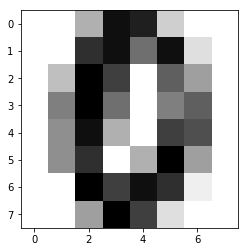

In [13]:
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [21]:
%run C:\Users\吴旭辉\Desktop\py学习手记\机械学习\MySkl\model_selection.py
X_train, X_test, y_train, y_test = train_test_split(x, y, test_ratio=0.2)

In [38]:
%run C:\Users\吴旭辉\Desktop\py学习手记\机械学习\MySkl\KNN_classify.py
my_knn_clf = KNNClassifier(k=3)

In [39]:
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [24]:
y_predict = my_knn_clf.predict(X_test)

In [139]:
y_predict

array([3, 9, 7, 6, 9, 7, 0, 5, 5, 0, 3, 7, 8, 3, 8, 8, 7, 1, 3, 9, 5, 3,
       8, 0, 4, 3, 6, 1, 8, 9, 2, 8, 7, 0, 1, 5, 7, 6, 0, 4, 8, 9, 3, 5,
       4, 5, 2, 1, 1, 3, 6, 8, 4, 1, 8, 7, 1, 5, 2, 8, 6, 1, 8, 8, 5, 7,
       4, 2, 7, 8, 3, 5, 0, 0, 6, 3, 3, 0, 1, 6, 8, 7, 1, 2, 0, 9, 7, 0,
       6, 2, 1, 1, 1, 6, 6, 3, 0, 4, 1, 7, 0, 1, 8, 8, 8, 3, 1, 3, 4, 0,
       6, 7, 7, 7, 1, 4, 0, 6, 3, 9, 5, 7, 4, 1, 1, 5, 1, 6, 4, 0, 4, 8,
       9, 6, 1, 8, 2, 6, 3, 2, 5, 3, 5, 5, 0, 0, 3, 6, 3, 8, 5, 6, 9, 3,
       3, 2, 4, 7, 1, 2, 2, 8, 2, 2, 1, 3, 0, 2, 4, 5, 7, 3, 3, 6, 3, 7,
       9, 6, 9, 1, 1, 0, 5, 2, 4, 4, 2, 9, 2, 4, 5, 4, 4, 7, 4, 8, 2, 7,
       8, 0, 2, 2, 4, 0, 4, 3, 6, 0, 2, 3, 5, 3, 5, 7, 9, 9, 5, 6, 1, 2,
       4, 9, 2, 3, 7, 9, 4, 5, 2, 8, 7, 6, 3, 6, 0, 9, 9, 9, 0, 8, 7, 8,
       8, 7, 1, 8, 5, 2, 3, 3, 0, 7, 8, 9, 6, 3, 6, 9, 2, 2, 7, 4, 8, 9,
       8, 2, 3, 0, 6, 5, 3, 2, 1, 3, 9, 4, 0, 3, 7, 7, 8, 2, 9, 4, 4, 2,
       6, 9, 2, 4, 4, 7, 8, 9, 7, 3, 7, 1, 0, 4, 0,

In [140]:
sum(y_predict == y_test) / len(y_test)

0.9832869080779945

In [27]:
%run C:\Users\吴旭辉\Desktop\py学习手记\机械学习\MySkl\metrics.py

In [28]:
accuracy_score(y_test, y_predict)

0.9832869080779945

In [40]:
my_knn_clf.score(X_test, y_test)

0.9832869080779945

## scikit-learn中的accuracy_acore

In [42]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [45]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
y_predict = knn_clf.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9888888888888889

In [52]:
knn_clf.score(x_test, y_test)

0.9888888888888889

# 超参数

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9916666666666667

## 超参数和模型参数
超参数： 在算法运行前需要决定的参数
模型参数：算法中学习的参数

kNN算法没有模型参数
kNN算法中的k是典型的超参数

### 寻找好的超参数
#### 网格参数
#### 领域知识
#### 经验数值
#### 实验搜索

In [5]:
best_score = 0.0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ", best_k)
print("best_score = ", best_score)

best_k =  5
best_score =  0.9944444444444445


### 考虑距离
取距离大小倒数和\n
可以解平票问题

### 考虑距离？ 不考虑距离?

In [6]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ['uniform', 'distance']:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
            
print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_method = ", best_method)

best_k =  5
best_score =  0.9944444444444445
best_method =  uniform


## 距离
### 欧拉距离 : 两点距离
### 曼哈顿距离 ：维度距离
### 明可夫斯基距离 p=1是曼哈顿，p=2是欧拉距离, ++p...

In [9]:
%%time
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1,11):
    for p in range (1,6):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights='distance', p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p= p
            
print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_p = ", best_p)

best_k =  3
best_score =  0.9972222222222222
best_p =  5
Wall time: 22.3 s


## 网格搜索与k近邻算法中更多超参数

In [15]:
param_grid = [
    {
        'weights' : ['uniform'],
        'n_neighbors':[i for i in range(1, 11)]
    },
    {
        'weights':['distance'],
        'n_neighbors' : [i for i in range(1,11)],
        'p' : [i for i in range(1, 6)]
    }
]

In [16]:
knn_clf = KNeighborsClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid)

In [18]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 3min 2s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [20]:
grid_search.best_score_

0.988169798190675

In [21]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [22]:
knn_clf = grid_search.best_estimator_

In [24]:
knn_clf.score(X_test, y_test)

0.9944444444444445

In [27]:
%%time
# n_jobs-1使用所有核,verbose边搜索边输出,使用一个整数，数越大输出越详细
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   39.9s


Wall time: 1min 13s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.2min finished


### metric : string or callable, default 'minkowski'
### 更多种距离定义

## 数据归一化
### 将所有的数据映射到同一尺寸
#### 把所有数据映射到0-1之间   Xscale = （X - Xmin）/ （Xmax - Xmin）
#### 最值归一化 normalization
#### 适用于分布有明显边界的情况，受outlier影响较大
#### 均值方差归一化standardization
#### 数据分布没有明显的边界，有可能存在极端数据值
#### 均值方差归一化：把所有数据归一到均值为0方差为1的分布中
#### Xscale = (X - Xmean) / s

In [28]:
x = np.random.randint(0, 100, size = 100)

In [29]:
x

array([66, 28, 34, 95, 49, 19, 85, 29, 90, 91, 82, 81, 89, 42, 56, 66, 64,
       44, 71, 37, 60, 87, 15, 80, 48, 77, 22, 94, 15, 48, 45, 45, 12, 53,
       41, 13, 25, 23, 60, 79, 96,  1, 42, 80, 99, 70, 31, 94, 92, 30, 21,
       71, 23, 90,  7, 67, 12, 20, 57, 58, 48, 10, 79, 46, 68, 53, 86,  7,
       90,  6, 11, 92, 63, 41, 26, 38, 35, 44, 47, 79, 65, 97, 82,  3, 72,
       73, 99,  0, 16, 88, 17, 91, 60, 43, 14, 64, 37, 16, 47, 78])

In [30]:
(x - np.min(x)) / (np.max(x) - np.min(x))  # 最值归一化

array([0.66666667, 0.28282828, 0.34343434, 0.95959596, 0.49494949,
       0.19191919, 0.85858586, 0.29292929, 0.90909091, 0.91919192,
       0.82828283, 0.81818182, 0.8989899 , 0.42424242, 0.56565657,
       0.66666667, 0.64646465, 0.44444444, 0.71717172, 0.37373737,
       0.60606061, 0.87878788, 0.15151515, 0.80808081, 0.48484848,
       0.77777778, 0.22222222, 0.94949495, 0.15151515, 0.48484848,
       0.45454545, 0.45454545, 0.12121212, 0.53535354, 0.41414141,
       0.13131313, 0.25252525, 0.23232323, 0.60606061, 0.7979798 ,
       0.96969697, 0.01010101, 0.42424242, 0.80808081, 1.        ,
       0.70707071, 0.31313131, 0.94949495, 0.92929293, 0.3030303 ,
       0.21212121, 0.71717172, 0.23232323, 0.90909091, 0.07070707,
       0.67676768, 0.12121212, 0.2020202 , 0.57575758, 0.58585859,
       0.48484848, 0.1010101 , 0.7979798 , 0.46464646, 0.68686869,
       0.53535354, 0.86868687, 0.07070707, 0.90909091, 0.06060606,
       0.11111111, 0.92929293, 0.63636364, 0.41414141, 0.26262

In [31]:
x = np.random.randint(0, 100, size=(50,2))

In [32]:
x

array([[77, 63],
       [24, 88],
       [33, 45],
       [53, 23],
       [48, 55],
       [65,  9],
       [96, 86],
       [66,  6],
       [92, 71],
       [ 5, 66],
       [97,  7],
       [11, 88],
       [35, 93],
       [95, 40],
       [55, 39],
       [82, 97],
       [ 7, 98],
       [27,  3],
       [99, 37],
       [70,  7],
       [94,  5],
       [71,  6],
       [43, 97],
       [43,  3],
       [79,  7],
       [49, 99],
       [12, 68],
       [17, 92],
       [79,  9],
       [50, 10],
       [86, 25],
       [91, 83],
       [ 8, 33],
       [97, 33],
       [ 2,  7],
       [79, 28],
       [62, 58],
       [ 0, 39],
       [31,  8],
       [81, 26],
       [30, 99],
       [ 0, 42],
       [99, 66],
       [64, 96],
       [38, 30],
       [59, 75],
       [83, 14],
       [59, 63],
       [74, 32],
       [70, 36]])

In [33]:
x = np.array(x, dtype=float)

In [34]:
x[:10]

array([[77., 63.],
       [24., 88.],
       [33., 45.],
       [53., 23.],
       [48., 55.],
       [65.,  9.],
       [96., 86.],
       [66.,  6.],
       [92., 71.],
       [ 5., 66.]])

In [35]:
x[:,0] = (x[:,0] - np.min(x[:,0])) / (np.max(x[:,0]) - np.min(x[:,0]))

In [37]:
x[:,1] = (x[:,1] - np.min(x[:,1])) / (np.max(x[:,1]) - np.min(x[:,1]))

In [38]:
x[:10, :]

array([[0.77777778, 0.625     ],
       [0.24242424, 0.88541667],
       [0.33333333, 0.4375    ],
       [0.53535354, 0.20833333],
       [0.48484848, 0.54166667],
       [0.65656566, 0.0625    ],
       [0.96969697, 0.86458333],
       [0.66666667, 0.03125   ],
       [0.92929293, 0.70833333],
       [0.05050505, 0.65625   ]])

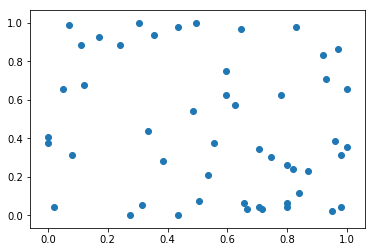

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1])
plt.show()

In [44]:
np.mean(x[:,0])

0.563030303030303

In [46]:
np.std(x[:,0]) # 方差

0.31059126186311137

In [48]:
np.mean(x[:,1])

0.45

In [49]:
np.std(x[:,1]) # 方差

0.3435226520915324

## 均值方差归一化 Strandardization

In [50]:
x2 = np.random.randint(0, 100, (50,2))

In [51]:
x2 = np.array(x2, dtype=float)

In [52]:
x2[:,0] = (x2[:,0] - np.mean(x2[:,0])) / np.std(x2[:,0])

In [53]:
x2[:,1] = (x2[:,1] - np.mean(x2[:,1])) / np.std(x2[:,1])

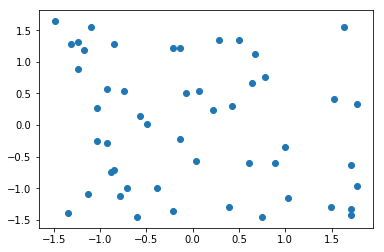

In [54]:
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [55]:
np.mean(x2[:,0])

1.1546319456101628e-16

In [56]:
np.std(x2[:,1])

1.0

In [57]:
np.mean(x2[:,1])

7.549516567451065e-17

In [60]:
np.std(x2[:,1])

1.0

## 测试数据集如何归一化
#### (x_test - mean_train) / std_train
#### 测试数据是模拟真实环境
#### 真实数据很有可能无法得到所有测试数据的均值和方差
#### 对数据的归一化也是算法的一部分

### scikit-learn 中的 Scaler

In [26]:
import numpy as np
from sklearn import datasets

In [27]:
iris = datasets.load_iris()

In [28]:
X = iris.data
y = iris.target

In [29]:
X[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

### scikit-learn中的StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
standarScaler = StandardScaler()

In [33]:
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
standarScaler.mean_

array([5.87410714, 3.03839286, 3.84107143, 1.22321429])

In [35]:
standarScaler.scale_ # 方差(数据分布范围)

array([0.81796192, 0.39375607, 1.69924109, 0.74821002])

In [36]:
standarScaler.transform(X_train)

array([[-1.80217087, -0.3514685 , -1.43656568, -1.36754956],
       [ 0.76518581, -0.09750416,  0.97627616,  0.77088745],
       [ 0.27616549, -0.09750416,  0.44662795,  0.2362782 ],
       [-0.21285483, -0.3514685 ,  0.21122875,  0.10262588],
       [-1.55766071,  0.15646017, -1.37771588, -1.36754956],
       [ 2.47675693,  1.93421053,  1.50592437,  1.03819207],
       [ 1.25420613,  0.41042451,  1.09397577,  1.43914901],
       [-0.57962007,  0.91835318, -1.26001628, -1.36754956],
       [ 1.00969597,  0.66438884,  1.09397577,  1.70645363],
       [-0.57962007,  2.18817486, -1.26001628, -1.10024493],
       [ 0.64293073,  0.15646017,  0.97627616,  0.77088745],
       [ 1.13195105, -0.60543284,  0.56432756,  0.2362782 ],
       [ 2.23224677, -1.11336151,  1.80017338,  1.43914901],
       [ 1.49871629, -0.09750416,  1.21167537,  1.17184438],
       [ 0.64293073,  0.41042451,  0.38777815,  0.36993051],
       [-1.31315055,  0.91835318, -1.14231667, -1.36754956],
       [-1.06864039,  1.

In [37]:
X_train = standarScaler.transform(X_train)

In [38]:
X_test_standar = standarScaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_clf = KNeighborsClassifier(n_neighbors=3,metric='minkowski')

In [41]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
knn_clf.score(X_test_standar, y_test)

0.9736842105263158

#### 缺点1：效率低下，每个数据都需要O(n*m)
#### 缺点2：高度数据相关
#### 缺点3：预测结果不具有可解释性
#### 缺点4： 维数灾难，随着维度的增加，“看似相近”的两个点之间的距离越来越大,解决方法：降维

### 对数据进行分类为训练数据和测试数据、 再使用Scaler进行数据归一化（可能存在数据尺度不一）, 对数据进行训练得到模型，测试数据同样需要使用归一化，然后送进模型来看分类准确度：accuracy来看模型的好坏使用网格搜索寻找最好的超参数

In [18]:
import pandas as pd

In [24]:
np.mean(X_train)

1.2965818894729507e-15

In [25]:
np.std(X_train)

1.0